 #  NoteBook
 

<center>
    <img src="bottleneck.jpg" width="400" height="200" />
</center>

## Mission 

- <p style="font-family: Arial; font-size:1.4em;color:Navy;"> Optimisez la gestion des données d'une boutique à vin</p>


# Importation

## Importation des librairies

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as stats
import seaborn as sns

## Importation des fichiers

In [3]:
erp = pd.read_excel("erp.xlsx") 
liaison = pd.read_excel("liaison.xlsx")
web = pd.read_excel("web.xlsx") 

C:\Users\HP\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Observation et nettoyage des fichiers

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Faire les observations des donnes et ainsi pouvoir parcourir chacune des colonnes pour détecter les erreurs, les corriger, puis actualiser les colonnes en conséquence</p>


## Fichier ERP 

### Observations ERP

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Afficher les 5 premiers lignes du dataframe pour verifier que les données sont bien chargées</p> 

In [4]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


-  <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Reennvoie les étiquettes de colonne du Dataframe</p>  

In [5]:
erp.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status'], dtype='object')

- Renvoyer les types de variable de chaque colonne attribué

In [6]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

- Cette méthode imprime des informations sur un DataFrame, y compris le dtype d’index et les colonnes, les valeurs non null et l’utilisation de la mémoire.

In [7]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Combien lignes et colonnes sont contenus dans le dataframe</p>  

In [8]:
erp.shape

(825, 5)

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Renvoyer des valeurs uniques basées sur une table</p>  

In [9]:
erp['onsale_web'].unique()

array([1, 0], dtype=int64)

In [10]:
erp['stock_quantity'].unique()

array([  0,  15,  34,  12,  66,  36,  22,  46,  41,  35,  16, 112, 267,
        73,  60,  10,  27,  65,  31, 157,  98,  28,  11,  50,  54,  53,
        48,  14,  37,  45,  24,  19,  26,  43,   7,   6,  42,   5,   1,
         8,  33,  18,  17,  57, 128,  70,  58, 167, 100,  94, 276, 109,
        47, 137,  90,  99, 209,  55,  13, 105, 190,  69,  89, 195, 578,
         2,  83, 180,  20,  49,  85, 141,  25,  64, 102,  21,  56,   4,
       133,   3,  96,   9,  61,  39, 237, 114, 106,  23,  32,  93, 161,
        30, 178,  29, 151, 140,  76,  97, 163,  62, 257, 284, 168, 143,
        92,  88,  44,  95, 289,  72, 203, 129,  38,  63, 130,  51, 123,
       118, 101,  84, 132, 211, 124, 120, 363, 192,  40,  91], dtype=int64)

In [11]:
erp['stock_status'].unique()

array(['outofstock', 'instock'], dtype=object)

-  <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Renvoyer une série contenant le nombre de lignes uniques dans le DataFrame </p>  

In [12]:
erp.value_counts()

product_id  onsale_web  price  stock_quantity  stock_status
3847        1           24.2   0               outofstock      1
5610        1           18.0   11              instock         1
5564        1           30.8   21              instock         1
5565        1           92.0   0               outofstock      1
5566        1           27.5   17              instock         1
                                                              ..
4635        1           62.4   3               instock         1
4636        1           50.0   4               instock         1
4646        1           21.5   34              instock         1
4647        1           28.5   48              instock         1
7338        1           16.3   45              instock         1
Length: 825, dtype: int64

-  <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Calcul des statistiques élementaires (min,max,moyenne, écart type...) pour toutes les variables quantitatives </p>   

In [13]:
erp.describe(include = 'all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> isna() method (or it's alias isnull() and then sum to count the NaN values.</p>   

isna converte chaqu'un des cellules df en un valeurs booleanset ensuite calculer la moyenne. les valeur booleans sont convertis en booleans et apres converti en valeur entiere 0 et 1 et ensuite la moyenne de les colonnes

In [14]:
erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [15]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [16]:
erp.isna().mean()

product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Analyser uniquement les valeurs en double.</p> 

In [17]:
erp.duplicated('product_id').sum()

0

### Nettoyage ERP

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Changer le type de cette colonne product_id de int64 a object.</p> 

In [18]:
erp['product_id']= erp['product_id'].astype(object)
erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

## Fichier LIAISON 

### Observations Liaison

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Afficher les 5 premiers lignes du dataframe pour verifier que les données sont bien chargées.</p> 

In [19]:
liaison.tail()

,product_id,id_web
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1
824,7338,16230


- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Reennvoie les étiquettes de colonne du Dataframe.</p> 

In [20]:
liaison.columns

Index(['product_id', 'id_web'], dtype='object')

- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Renvoyer les types de variable de chaque colonne attribué.</p>  

In [21]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

-  <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Cette méthode imprime des informations sur un DataFrame, y compris le dtype d’index et les colonnes, les valeurs non null et l’utilisation de la mémoire.</p>   

In [22]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


-  <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Combien lignes et colonnes sont contenus dans le dataframe.</p>    


In [23]:
liaison.shape

(825, 2)

- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Renvoyer des valeurs uniques basées sur une table.</p>  

In [24]:
liaison['product_id'].nunique()

825

In [25]:
liaison['id_web'].nunique()

734

- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Renvoyer une série contenant le nombre de lignes uniques dans le DataFrame.</p>   

In [26]:
liaison.value_counts()

product_id  id_web
3847        15298     1
5479        16305     1
5481        15138     1
5483        15753     1
5484        15756     1
                     ..
4613        15030     1
4614        15875     1
4615        16186     1
4616        14371     1
7338        16230     1
Length: 734, dtype: int64

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Calcul des statistiques élementaires (min,max,moyenne, écart type...) pour toutes les variables quantitatives.</p>    

In [27]:
liaison.describe(include = 'all')

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


-  <p style="font-family: Arial; font-size:1.1em;color:Navy;"> isna() method (or it's alias isnull() and then sum to count the NaN values.</p>   
isna converte chaqu'un des cellules df en un valeurs booleanset ensuite calculer la moyenne. les valeur booleans sont convertis en booleans et apres converti en valeur entiere 0 et 1 et ensuite la moyenne de les colonnes



In [28]:
liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

In [29]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [30]:
liaison.isna().mean()

product_id    0.000000
id_web        0.110303
dtype: float64

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Analyser uniquement les valeurs en double.</p>    

In [31]:
liaison.duplicated('id_web').sum()

90

### Nettoyage  Liaison

-  <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Changer le type de cette colonne product_id de int64 a object.</p>     

In [32]:
liaison['product_id']= liaison['product_id'].astype(object)
liaison.dtypes

product_id    object
id_web        object
dtype: object

## Fichier WEB

### Observations Web

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Afficher les 5 premiers lignes du dataframe pour verifier que les données sont bien chargée.</p>      

In [33]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Reennvoie les étiquettes de colonne du Dataframe.</p>   

In [34]:
web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Renvoyer les types de variable de chaque colonne attribué.</p>    

In [35]:
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Cette méthode imprime des informations sur un DataFrame, y compris le dtype d’index et les colonnes, les valeurs non null et l’utilisation de la mémoire.</p>     

In [36]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Combien lignes et colonnes sont contenus dans le dataframe.</p>  

In [37]:
web.shape

(1513, 28)

- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Renvoyer des valeurs uniques basées sur une table.</p>   

In [38]:
web['sku'].nunique()

714

In [39]:
web['total_sales'].unique()

array([10.,  6.,  0.,  3.,  7., 14.,  1., 23., 18., 11.,  9., 20., 19.,
       62.,  4., 12.,  5.,  2., 40., 30., 87., 36., 43., 13., 17., 42.,
        8., 46., 16., 15., nan, 96., 32., 38., 29., 33., 22., 24., 26.,
       21., 41., 37.])

In [40]:
web['tax_status'].unique()

array(['taxable', nan], dtype=object)

In [41]:
web['tax_class'].unique()

array([nan])

In [42]:
web['post_author'].unique()

array([ 1.,  2., nan])

In [43]:
web['post_date'].nunique()

716

In [44]:
web['post_date_gmt'].nunique()

716

In [45]:
web['post_content'].unique()

array([nan])

In [46]:
web['post_title'].nunique()

713

In [47]:
web['post_excerpt'].nunique()

679

In [48]:
web['post_status'].unique()

array(['publish', nan], dtype=object)

In [49]:
web['ping_status'].unique()

array(['closed', nan], dtype=object)

In [50]:
web['post_password'].unique()

array([nan])

In [51]:
web['post_name'].nunique()

716

In [52]:
web['post_modified'].nunique()

589

In [53]:
web['post_modified_gmt'].nunique()

589

In [54]:
web['post_content_filtered'].unique()

array([nan])

In [55]:
web['post_parent'].unique()

array([ 0., nan])

In [56]:
web['guid'].nunique()

1430

In [57]:
web['menu_order'].unique()

array([ 0., nan])

In [58]:
web['post_type'].unique()

array(['product', nan, 'attachment'], dtype=object)

In [59]:
web['post_mime_type'].unique()

array([nan, 'image/jpeg'], dtype=object)

In [60]:
web['comment_count'].unique()

array([ 0., nan])

- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Renvoyer une série contenant le nombre de lignes uniques dans le DataFrame.</p>  

In [61]:
web['sku'].value_counts()

bon-cadeau-25-euros    2
14828                  2
14679                  2
15526                  2
16305                  2
                      ..
15145                  2
15801                  2
15452                  2
15038                  2
16230                  2
Name: sku, Length: 714, dtype: int64

- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Calcul des statistiques élementaires (min,max,moyenne, écart type...) pour toutes les variables quantitatives.</p>   


In [62]:
web.describe(include ='all', datetime_is_numeric=True)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,716,NaN,NaN,NaN,NaN,1430,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,...,bon-cadeau-de-25-euros,NaN,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,2018-08-22 03:22:17.090908928,...,NaN,2020-06-20 13:59:29.781818368,2020-06-20 12:06:02.509090816,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,2018-02-27 20:01:12.500000,...,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,2018-04-19 14:56:05,...,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,2019-01-31 14:35:47,...,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,NaN,2.000000,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,NaN,0.0,NaN,NaN,0.0


- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  isna() method (or it's alias isnull() and then sum to count the NaN values.</p>    

isna converte chaqu'un des cellules df en un valeurs booleanset ensuite calculer la moyenne. les valeur booleans sont convertis en booleans et apres converti en valeur entiere 0 et 1 et ensuite la moyenne de les colonnes

In [63]:
web.isna().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [64]:
web.isna().mean()

sku                      0.056180
virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
average_rating           0.054858
total_sales              0.054858
tax_status               0.526768
tax_class                1.000000
post_author              0.054858
post_date                0.054858
post_date_gmt            0.054858
post_content             1.000000
post_title               0.054858
post_excerpt             0.526768
post_status              0.054858
comment_status           0.054858
ping_status              0.054858
post_password            1.000000
post_name                0.054858
post_modified            0.054858
post_modified_gmt        0.054858
post_content_filtered    1.000000
post_parent              0.054858
guid                     0.054858
menu_order               0.054858
post_type                0.054858
post_mime_type           0.528090
comment_count            0.054858
dtype: float64

- <p style="font-family: Arial; font-size:1.3em;color:Navy;"> <strong>Valeurs Manquantes</strong>.</p>  

- <p style="font-family: Arial; font-size:1.1em;color:Navy;">  Recuperer le nombre de nan pour la colonne sku gardé dans un dataframe nomé nulle et garde en format <strong>CSV</strong> nomé "observations_lignes_nulles.</p>  

In [65]:
nulle = web[web['sku'].isnull()]
#les mettre en un csv
nulle.to_csv("observations_lignes_nulles.csv", index=False)
print (nulle.shape)
nulle.head(2)

(85, 28)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Garder en el dataframe <strong>Observation</strong> les lignes qui ont des valeurs et enregistrement en format <strong>CSV</strong> nomé "observations_lignes_valeurs".</p> 

In [66]:
observation = nulle[nulle['post_name'].notnull()]
#les mettre en un csv
observation.to_csv("observations_lignes_valeurs.csv", index=False)
observation

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [67]:
web_sans_null = web[web['sku'].notnull()]
web_sans_null.shape
web_sans_null
#ce dataframe est compose de moitie image et moitie produit. chaque produit a une image

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [68]:
web = web_sans_null[web_sans_null['post_type'] == 'product']
print(web.shape)
web.head()

(714, 28)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


### Nettoyage  Web

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Renomage de colonne SKU a Id_web.</p>   

In [69]:
web.rename(columns={'sku':'id_web'}, inplace=True) 
web.columns

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['id_web', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Afficher uniquement les variables qui ont des valeurs manquantes.</p>   

In [70]:
NB_NAN = web['id_web'].isna().sum()
NB_NAN[NB_NAN>0]

array([], dtype=int64)

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Suppression de colonne NB-NAN.</p>   

#web = web.drop(['NB-NAN'],axis=1)

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Supression des duplicatas en gardant les versions le mieux remplies.</p>

In [71]:
web = web.drop_duplicates('id_web', keep='first')
web['id_web'].count()

714

# Analises des données

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Realisation d'une fonction pour tester la clé primaire de chaque fichier.</p> 

In [72]:
def test(df, colonnes):
    if df.size ==  df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))   
    else:
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Appliquer la fonction en Test pour product_id.</p> 

In [73]:
test(erp, ['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 5) (lignes, colonnes)


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Verification avec ".size" </p> 

In [74]:
erp.size

4125

In [75]:
erp.drop_duplicates(['product_id']).size

4125

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Appliquer la fonction en Test1 pour id_web.</p> 

In [76]:
test(web, ['id_web'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (714, 28) (lignes, colonnes)


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Verification avec ".size" </p> 

In [77]:
web.size

19992

In [78]:
web.drop_duplicates(['id_web']).size

19992

 <h2>Mission 1</h2>

<p style="font-family: Arial; font-size:1.3em;color:navy;"><strong>JOINTURE</strong></p>
- faire un outer, en utilisant indicator = True
- creation d'une nouvelle colonne _merge
- en utilisant cette colonne (both, left_join, right_join)
= both - les lignes correspondantes ont trouve une liaison 
les autres veulent dire que ces lignes n ont pas trouve de correspondance.
= verifier le contenu des lignes n ayant pas trouve de correspondance et les garder dans un nouveau fichier
ensuite les supprimer et conserver suelement les both
- supprimer la colonne _merge 






- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Premièrement, rapprocher un export de l’ERP et LIAISON  </p>  

In [79]:
erp_liaison = pd.merge (erp, liaison, on = 'product_id', how = "outer",  indicator=True)            
erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Verification pour connaitre la difference (entre erp, liaison).</p> 

    **both** - les lignes correspondantes ont trouve une liaison.     
    les autres veulent dire que ces lignes n'ont pas trouve de correspondance.

In [80]:
test = erp_liaison[erp_liaison['_merge']!= 'both']
print(test.shape)
test.head()

(0, 7)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


- Supprimer colonne _merge du dataframe outer_erp

In [81]:
erp_liaison = erp_liaison.drop(['_merge'],axis=1)

In [82]:
erp_liaison.shape

(825, 6)

- <p style="font-family: Arial; font-size:1.3em;color:navy;"> Merge erp_liaison et web.</p> 
<p style="font-family: Arial; font-size:1.1em;color:black;"> Raprocher deux exports : un export de l’ERP et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne.</p> 


In [83]:
erp_web = pd.merge (erp_liaison, web, on = 'id_web', how = "outer", indicator = True)
erp_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Connaitre la difference entre _merge (erp_liaison, web).</p>  

    **both**- les lignes correspondantes ont trouve une liaison.     
    les autres veulent dire que ces lignes n'ont pas trouve de correspondance.

In [84]:
test1 = erp_web[erp_web['_merge']!= 'both']
print(test1.shape)
test1.head(20)

(111, 34)


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24,4233,0,20.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
25,4278,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
26,4279,0,10.8,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
27,4565,0,30.5,3,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
28,4577,0,49.0,1,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [85]:
test2 = erp_web[erp_web['_merge']=='left_only']
test2.shape

(111, 34)

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Donnes <strong>instock</strong> du Test1 on ete enregistres dans un dataframe nomé  Instock_Test1 et enregistres en csv.</p>  

In [86]:
Instock_Test1=test1.loc[test1['stock_status'] =='instock',:]
Instock_Test1.to_csv("Instock_Test1.csv", index=False)
Instock_Test1.head()


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
27,4565,0,30.5,3,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
28,4577,0,49.0,1,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
29,4578,0,40.0,3,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
33,4692,0,12.0,48,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
35,4697,0,34.5,1,instock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


- <p style="font-family: Arial; font-size:1.1em;color:Navy;">Donnes  <strong>outofstock</strong> du Test1 on ete enregistres dans un dataframe nomé  Outoftock_Test1 .</p>  

In [87]:
outofstock_Test1=test1.loc[test1['stock_status'] =='outofstock',:]
outofstock_Test1.head(20)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
24,4233,0,20.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
25,4278,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
26,4279,0,10.8,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
30,4594,1,144.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
31,4599,0,36.9,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


- <p style="font-family: Arial; font-size:1.1em;color:Navy;">Conserver en dataframe final <strong>df</strong> les correspondances "both" </p>  

In [88]:
df = erp_web[erp_web['_merge'] =='both']
df.shape

(714, 34)

- <p style="font-family: Arial; font-size:1.1em;color:Navy;">Supprimer colonne _merge du df.</p>  

In [89]:
df= df.drop(['_merge'],axis=1)

## Mision 2

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> <strong>Chiffre d'Affaires Total et pour chaque produite</strong></p>  

In [90]:
df['revenues'] = df['price'] * df['total_sales']
print("Total de chiffre d'affaires:", df ['revenues'].sum())
print("-"*20)

df.revenues

Total de chiffre d'affaires: 70568.6
--------------------


0      145.2
1        0.0
2        0.0
3       42.3
4        0.0
       ...  
819     42.0
820      0.0
821      0.0
822      0.0
824      0.0
Name: revenues, Length: 714, dtype: float64

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Verification avec un liste pour connaitre s'il y à plus de LIAISON'id_web' ou WEB'id_web' avant SKU.</p>  

In [91]:
list(set(liaison.id_web.unique()).difference(web.id_web.unique()))

[nan,
 13577,
 14730,
 15630,
 14360,
 15272,
 14377,
 15529,
 14379,
 15154,
 14648,
 12601,
 14785,
 13771,
 '14680-1',
 15065,
 14689,
 15586,
 15608,
 15609,
 14715]

In [92]:
df.shape

(714, 34)

## Mission 3

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> <strong>Detection d'Outliers</strong></p>  

Des erreurs de saisie dans certains prix des produits? Une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.



Un *describe* peut potentiellement nous aider dans un premier temps :

In [93]:
df.describe()

,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,revenues
count,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000
mean,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,98.835574
std,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,307.685071
min,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
25%,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
50%,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,15.250000
75%,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,91.150000
max,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4704.000000


price (le max est 225 et le minimum 5.2)

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Obtention d'une graphique boite a moustache.</p>  

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


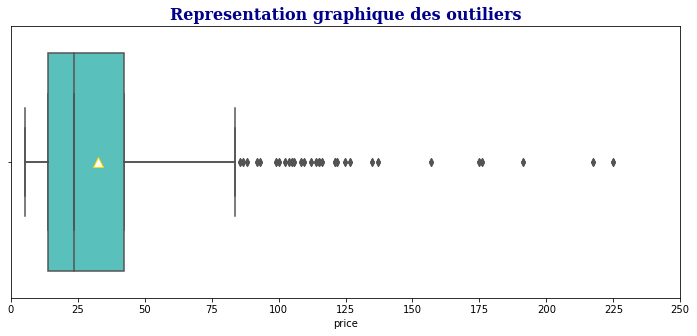

In [94]:
plt.figure(figsize=(12, 5))
sns.boxplot(df.price,showmeans=True, width=0.5  # showmeans "moyenne"
            ,meanprops={"markerfacecolor":"white" 
            ,"markeredgecolor": "gold"
            ,"markersize": "10"})
ax = sns.boxplot(x=df["price"], color='mediumturquoise')
ax.set_xlim(0, 250)
ax.set_title( "Representation graphique des outiliers") 
ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
plt.title("Representation graphique des outiliers", fontsize=16, fontdict={'family':'serif','color':'darkblue','weight': 'bold', 'size':30})

plt.show()



Dans le graphique ci-dessus, on peut clairement voir que les valeurs supérieures à un prix de 85 agissent comme des valeurs aberrantes.

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Obtention de le mode.</p>  

In [95]:
df['price'].mode()

0    19.0
dtype: float64

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Interquartile Range (IQR).</p>  

In [96]:
# Interquartile Range (IQR)

price = df['price']
x=sorted(price)

q1 = np.percentile(x, 25, interpolation='midpoint')
q3 = np.percentile(x, 75, interpolation='midpoint')
iqr = q3 - q1

print("IQR equals: " + str(iqr))
print ("q1 :","{:.3f}".format(q1))
print ("q3 :","{:.3f}".format(q3))


IQR equals: 28.050000000000004
q1 : 14.100
q3 : 42.150


In [97]:
# limite basse et supérieur

min = q1-1.5*iqr
max= q3+1.5*iqr

#drop the unnecessary columns
df = df.drop(columns=(['virtual','downloadable','rating_count','average_rating','tax_class','post_content_filtered','post_parent','menu_order','post_mime_type','comment_count']))

# Sélection des données inferieur à la limite basse et supérieur à la limite haute pour identifier les valeurs atypiques 
df[(df['price']<min)|(df['price']>max)]         

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_author,post_date,...,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,guid,post_type,revenues
154,4115,1,100.0,11,instock,15382,0.0,taxable,2.0,2018-02-13 11:08:45,...,publish,closed,closed,NaN,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
156,4132,1,88.4,5,instock,11668,0.0,taxable,2.0,2018-02-13 11:43:55,...,publish,closed,closed,NaN,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
291,4352,1,225.0,0,outofstock,15940,5.0,taxable,2.0,2018-03-02 10:30:04,...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,product,1125.0
293,4355,1,126.5,2,instock,12589,11.0,taxable,2.0,2018-03-02 10:46:10,...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,1391.5
297,4359,1,85.6,0,outofstock,13853,1.0,taxable,2.0,2018-03-02 11:11:48,...,publish,closed,closed,NaN,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,https://www.bottle-neck.fr/?post_type=product&...,product,85.6
310,4402,1,176.0,8,instock,3510,13.0,taxable,2.0,2018-03-22 11:21:05,...,publish,closed,closed,NaN,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,2288.0
311,4404,1,108.5,2,instock,3507,2.0,taxable,2.0,2018-03-22 11:32:55,...,publish,closed,closed,NaN,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,https://www.bottle-neck.fr/?post_type=product&...,product,217.0
313,4406,1,157.0,3,instock,7819,0.0,taxable,2.0,2018-03-22 11:42:48,...,publish,closed,closed,NaN,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
314,4407,1,104.0,6,instock,3509,1.0,taxable,2.0,2018-03-22 11:49:53,...,publish,closed,closed,NaN,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,104.0
320,4582,1,109.6,7,instock,12857,0.0,taxable,2.0,2018-04-12 17:56:13,...,publish,closed,closed,NaN,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


In [98]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q_1 = df.quantile(0.25)

   q3 = df.quantile(0.75)

   IQR1 = q3-q_1

   outliers = df[((df<(q_1-1.5*IQR1)) | (df>(q3+1.5*IQR1)))]

   return outliers

In [99]:
outliers = find_outliers_IQR(df['price'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 32
max outlier value: 225.0
min outlier value: 85.6


154    100.0
156     88.4
291    225.0
293    126.5
297     85.6
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
539     86.8
605     92.0
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64

In [100]:
outliers = find_outliers_IQR(df[['price']])
outliers.value_counts().sum()

32

In [101]:
#Position des Outliers
Max =  q3 + 1.5 * iqr
print("Max :","{:.3f}".format(Max) )
valeur_aberante = np.where (df['price']>= Max )
print(valeur_aberante[0])

Max : 84.225
[ 63  65 199 201 205 218 219 221 222 227 380 381 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657]



- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Determination des outliers grâce au <strong>Z-score</strong>  </p>

Déf Z-score: Le Z-Score est également appelé score standard. Cette valeur/score permet de comprendre à quelle distance se trouve le point de données de la moyenne. Et après avoir défini une valeur seuil, on peut utiliser les valeurs de score z des points de données pour définir les valeurs aberrantes. 

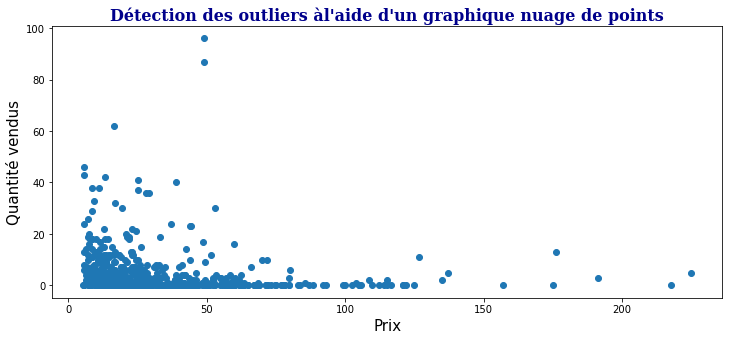

In [102]:
#Scatter plot

fig, ax =  plt.subplots(figsize = (12,5))
ax.scatter(df['price'], df['total_sales'])
plt.title("Détection des outliers àl'aide d'un graphique nuage de points", fontsize= 16, 
          fontdict={'family' : 'serif', 'color':'darkblue', 'weight' : 'bold', 'size': 30})
ax.set_xlabel('Prix', fontsize=15)
ax.set_ylabel('Quantité vendus', fontsize = 15)
plt.show()

In [103]:
print(np.where((df['price']>80)))

(array([ 63,  65, 196, 199, 201, 205, 218, 219, 221, 222, 227, 380, 381,
       426, 431, 432, 437, 438, 502, 506, 511, 553, 587, 602, 603, 604,
       642, 647, 648, 653, 654, 655, 656, 657], dtype=int64),)


In [104]:
#Zscore:
z = np.abs(stats.zscore(df['price']))
print(z)

0      0.298410
1      0.065016
2      0.420752
3      0.661837
4      0.486015
         ...   
819    0.866939
820    0.179667
821    1.313620
822    0.802664
824    0.582675
Name: price, Length: 714, dtype: float64


In [105]:
#Position des Outliers
print(np.where(z>2))

(array([ 63,  65, 199, 201, 218, 219, 221, 222, 227, 380, 381, 426, 431,
       432, 437, 502, 511, 553, 587, 602, 603, 604, 642, 647, 648, 653,
       654, 655, 656, 657], dtype=int64),)


In [106]:
threshold = 2 # seuil
mean = np.mean(df.price) #moyenne
std =  np.std(df.price) #ecart-type empirique

#verification si le z-scorre de chaque prix est au-dessus du seuil et ne garde que les resultat positifs
z_score_outlier = [i for i in df.price if (i-mean)/std > threshold]
#liste des outliers z-score
print(z_score_outlier)
print("-"*20)
#nombre d'outliers avec le Z-score
print ("nombre d'outliers avec le Z-score:", "{:.1f}".format (len(z_score_outlier)))
print("-"*20)
                                                
#determination du seuil deprix au-dessus duquel une données est un outliers avec Z6score
#(x-mean)/std= 2
# x-mean + 2*std
#x = 2*std + mean
seuil_outliers_z = 2*std + mean
print ("seuil_outliers_z:", "{:.1f}".format(round((seuil_outliers_z),2)))
print("-"*20)
#affichage complet des outliers Z-score|                                               
data_outliers_z = df.loc[df['price'] > seuil_outliers_z]
data_outliers_z

[100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]
--------------------
nombre d'outliers avec le Z-score: 30.0
--------------------
seuil_outliers_z: 88.1
--------------------


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_author,post_date,...,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,guid,post_type,revenues
154,4115,1,100.0,11,instock,15382,0.0,taxable,2.0,2018-02-13 11:08:45,...,publish,closed,closed,NaN,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
156,4132,1,88.4,5,instock,11668,0.0,taxable,2.0,2018-02-13 11:43:55,...,publish,closed,closed,NaN,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
291,4352,1,225.0,0,outofstock,15940,5.0,taxable,2.0,2018-03-02 10:30:04,...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,product,1125.0
293,4355,1,126.5,2,instock,12589,11.0,taxable,2.0,2018-03-02 10:46:10,...,publish,closed,closed,NaN,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,1391.5
310,4402,1,176.0,8,instock,3510,13.0,taxable,2.0,2018-03-22 11:21:05,...,publish,closed,closed,NaN,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,2288.0
311,4404,1,108.5,2,instock,3507,2.0,taxable,2.0,2018-03-22 11:32:55,...,publish,closed,closed,NaN,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,https://www.bottle-neck.fr/?post_type=product&...,product,217.0
313,4406,1,157.0,3,instock,7819,0.0,taxable,2.0,2018-03-22 11:42:48,...,publish,closed,closed,NaN,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
314,4407,1,104.0,6,instock,3509,1.0,taxable,2.0,2018-03-22 11:49:53,...,publish,closed,closed,NaN,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,104.0
320,4582,1,109.6,7,instock,12857,0.0,taxable,2.0,2018-04-12 17:56:13,...,publish,closed,closed,NaN,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.0
477,4903,1,102.3,20,instock,14805,0.0,taxable,2.0,2018-05-15 10:10:57,...,publish,closed,closed,NaN,domaine-des-croix-corton-grand-cru-les-greves-...,2020-06-27 09:00:07,2020-06-27 07:00:07,https://www.bottle-neck.fr/?post_type=product&...,product,0.0


Généralement une valeur aberrante est un erreur liée a une possible erreur de frape humaine ou de comprehension d'un quelconque transfère entre plusieurs logiciels.

Pour ce cas, se remarque la présence de valeurs aberrantés uniquement car il y a des vins qui sont beaucoup plus chères que des autres. En soit ces valeurs ne peuvent pas etre considerés come des outliers.

- <p style="font-family: Arial; font-size:1.1em;color:Navy;"> Code permettant d'afficher la courbe de Lorenz  </p>

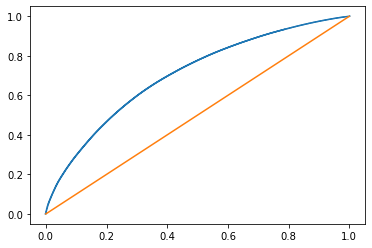

In [107]:
prices = df[df['price'] < 0]
dep = -df['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.show()